# [dimension reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)

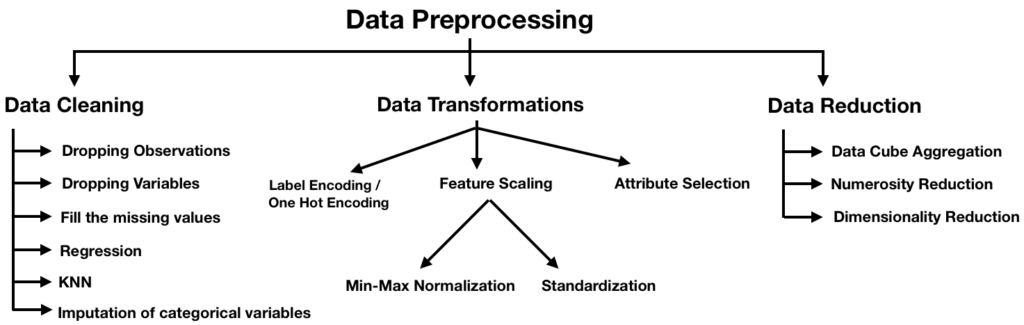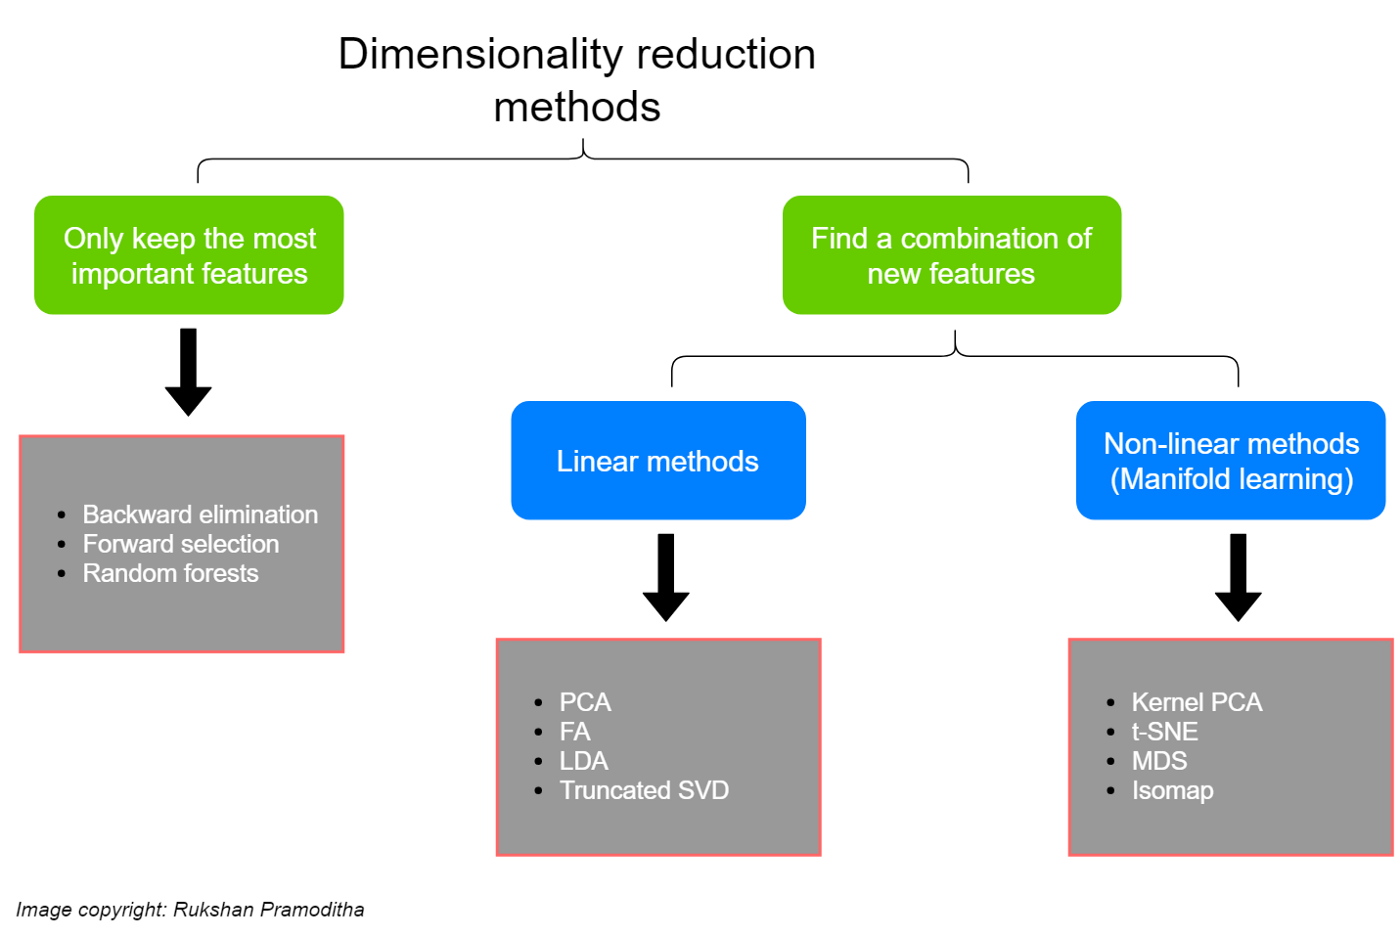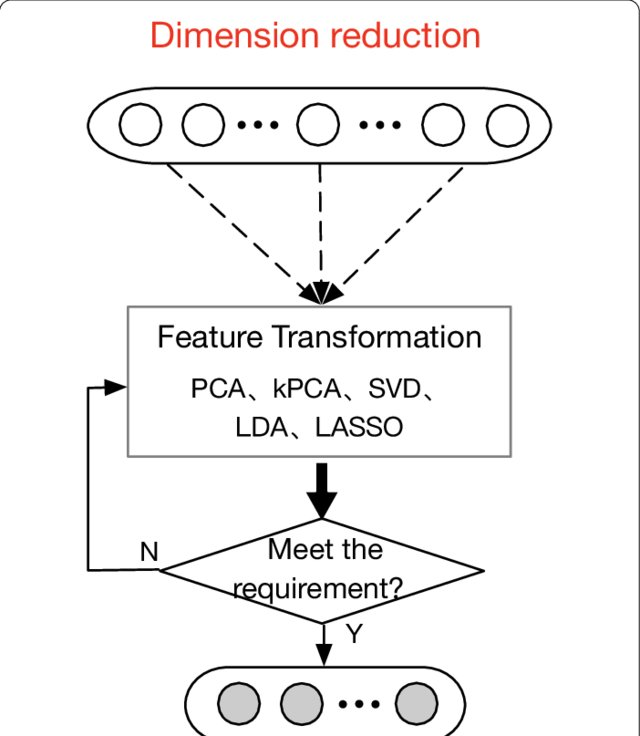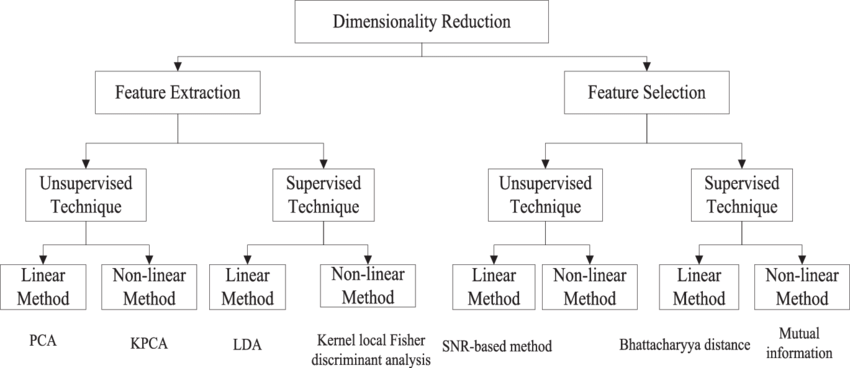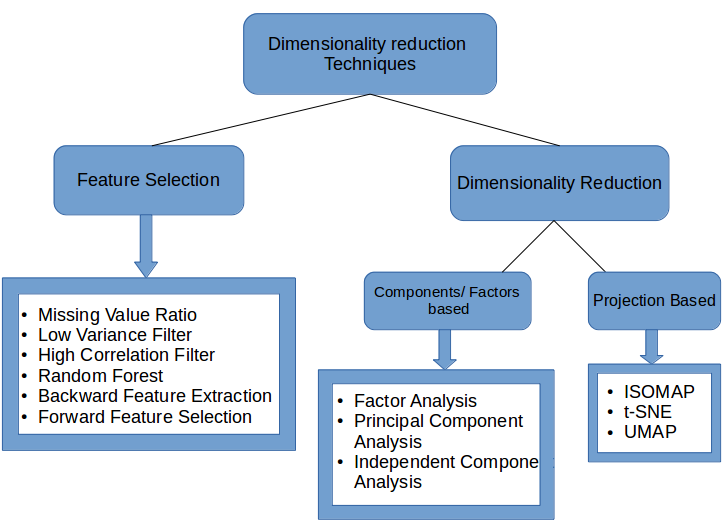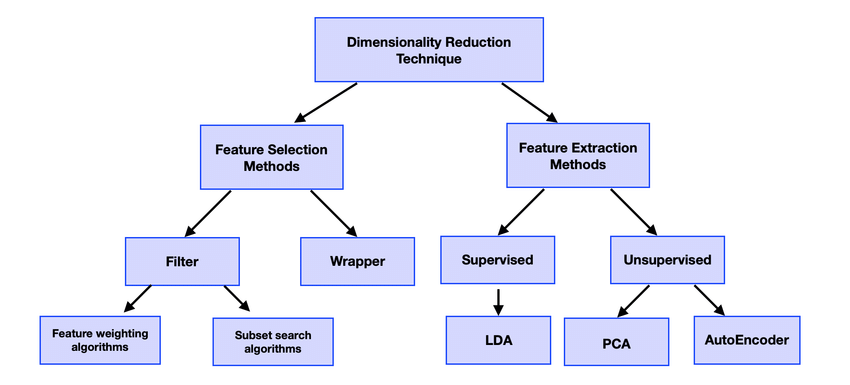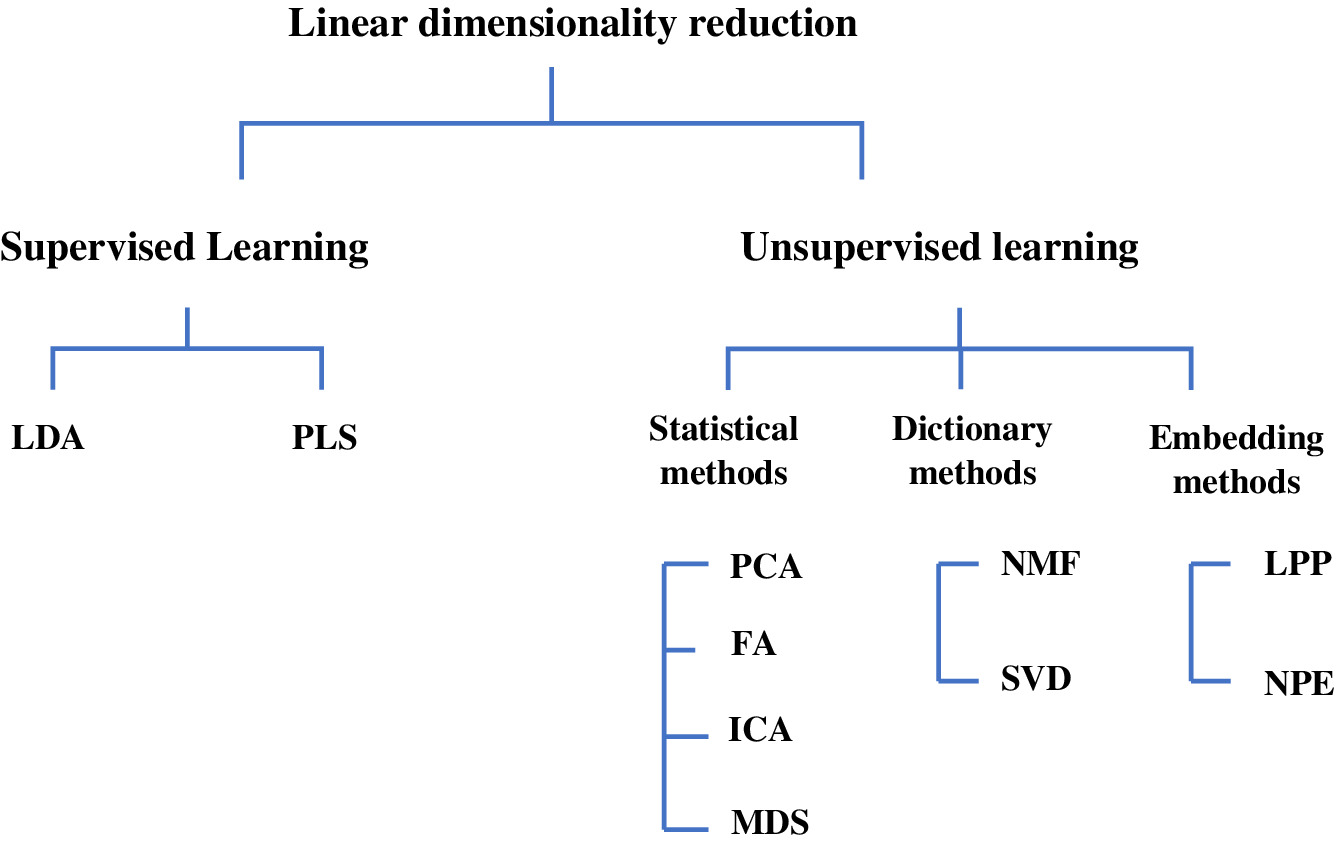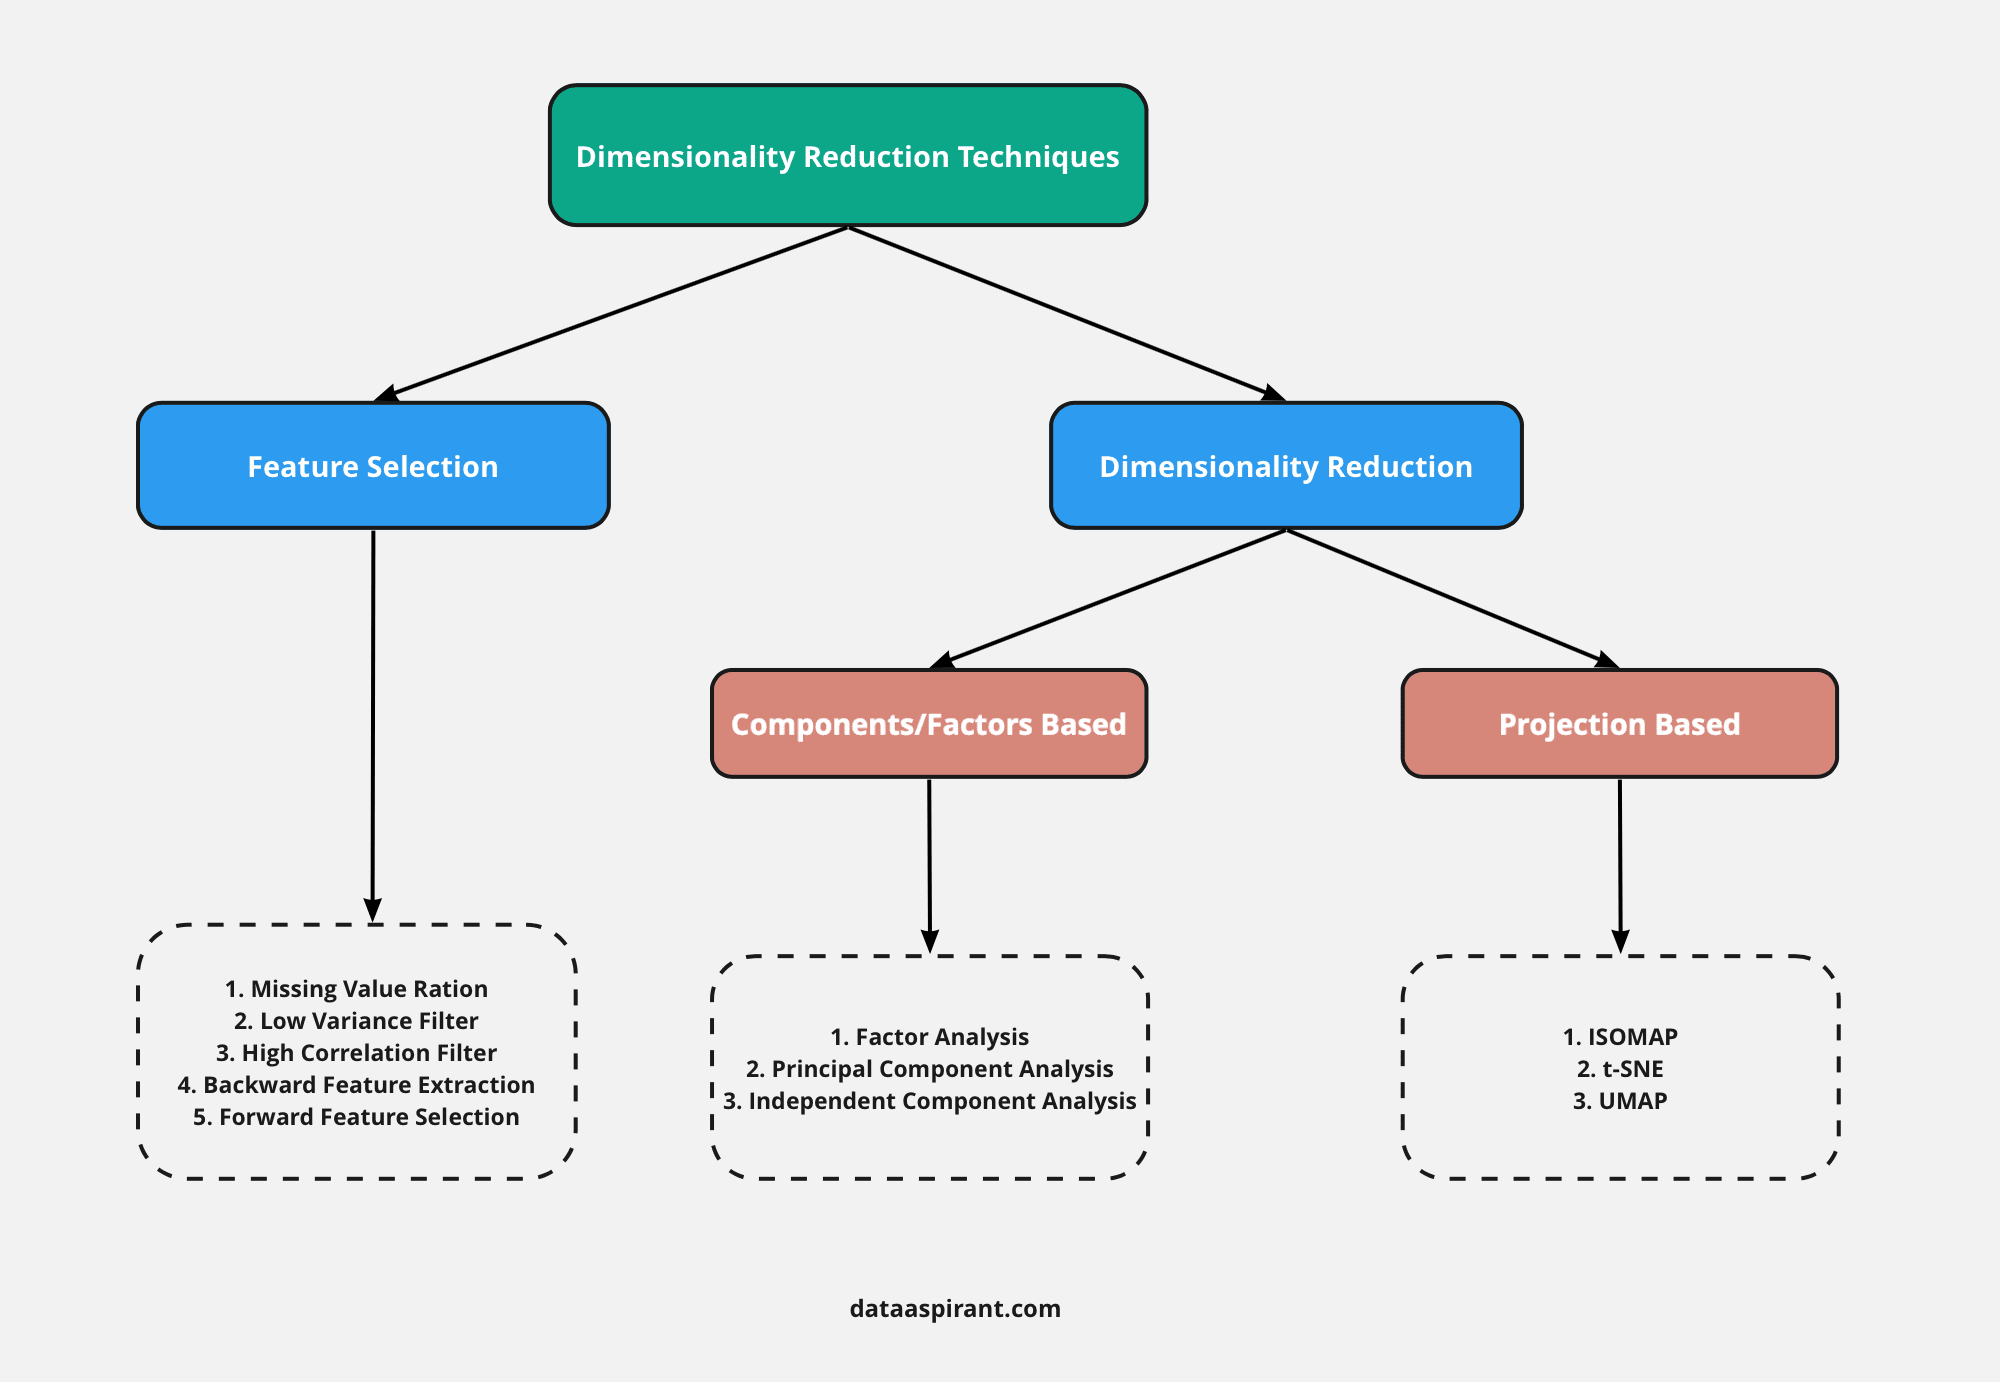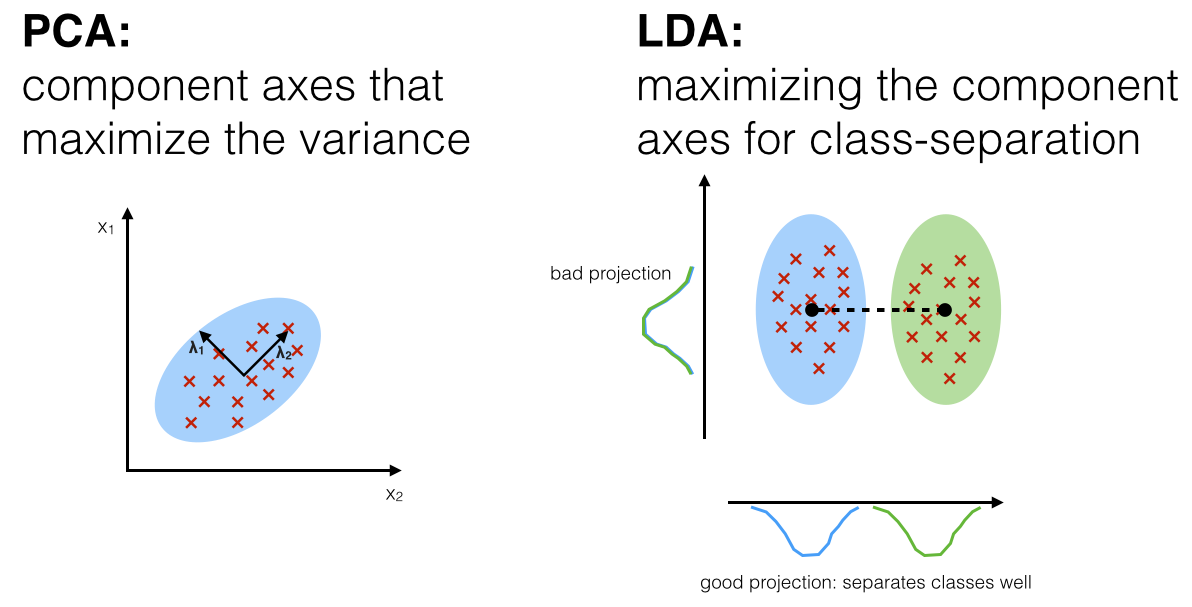

[What are the differences between Factor Analysis and Principal Component Analysis?](https://stats.stackexchange.com/questions/1576/what-are-the-differences-between-factor-analysis-and-principal-component-analysi)

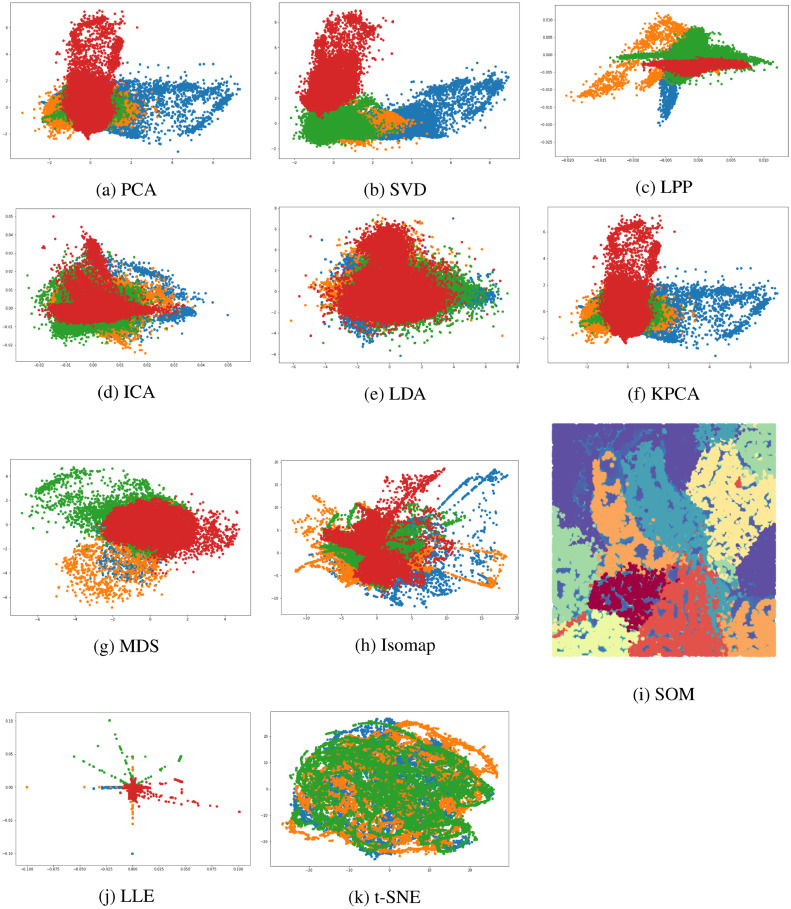

[Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html)

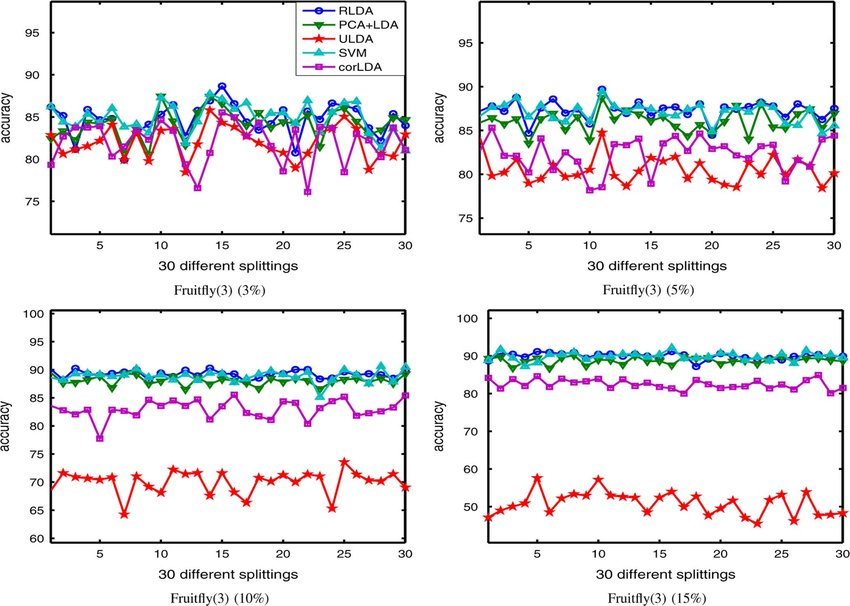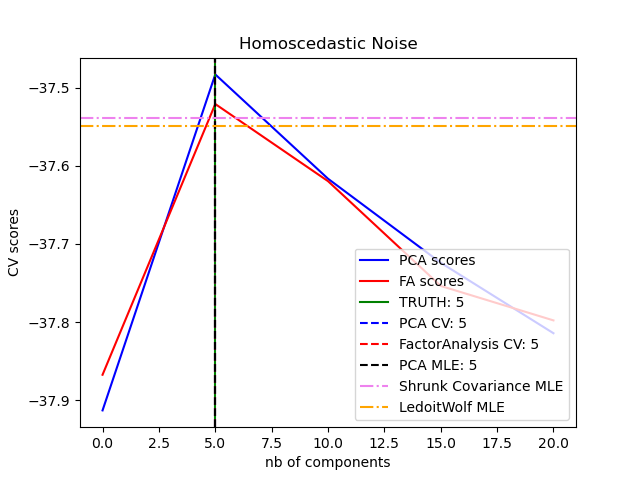

#  [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification) 

## **Principal Component Analysis (PCA)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
m_data = pd.read_csv('mushrooms.csv')

# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

In [4]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

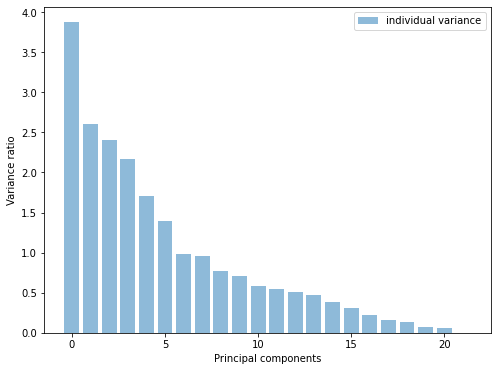

In [5]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [6]:
pca_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

In [7]:
pca.explained_variance_ratio_

array([1.84458684e-01, 1.23955899e-01, 1.14306801e-01, 1.03165737e-01,
       8.10867705e-02, 6.64182876e-02, 4.66039611e-02, 4.53247460e-02,
       3.66638866e-02, 3.38886068e-02, 2.74993066e-02, 2.58294323e-02,
       2.42651684e-02, 2.27216831e-02, 1.83057085e-02, 1.48185678e-02,
       1.04106068e-02, 7.59501185e-03, 6.26216657e-03, 3.48525415e-03,
       2.93371356e-03, 3.76432098e-35])

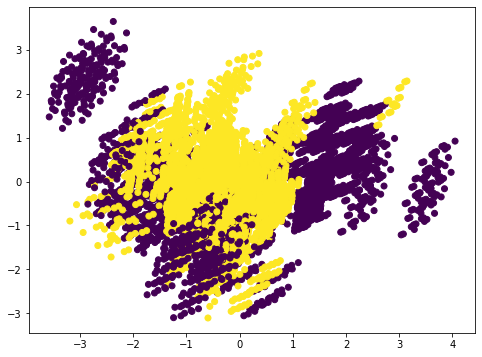

In [8]:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,4], x_3d[:,7], c=m_data['class'])
plt.show()

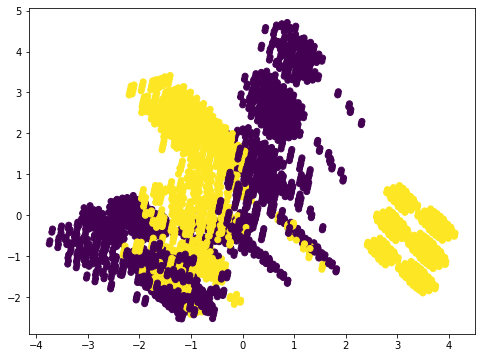

In [9]:
pca3 = PCA(n_components=2)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=m_data['class'])
plt.show()

## **Singular Value Decomposition (SVD)**

In [10]:
#Importing required modules
import numpy as np
from numpy import array
from scipy.linalg import svd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [11]:
# define a matrix
A = X_features
print("A=",A)
# SVD
U, S, V_T = svd(A)
# left singular vectors
#print(U)
# singular values
#print(S)
#right singular vectors
#print(V_T)

A= [[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [12]:
A.shape

(8124, 22)

In [13]:
U.shape

(8124, 8124)

In [14]:
S.shape

(22,)

In [15]:
V_T.shape

(22, 22)

In [16]:
print("S=")
print(S)

S=
[1.77396137e+02 1.45421361e+02 1.39646688e+02 1.32666829e+02
 1.17616867e+02 1.06448229e+02 8.91673830e+01 8.79351065e+01
 7.90885941e+01 7.60363852e+01 6.84944648e+01 6.63822602e+01
 6.43407708e+01 6.22608225e+01 5.58840504e+01 5.02802838e+01
 4.21436965e+01 3.59963804e+01 3.26856339e+01 2.43843864e+01
 2.23719303e+01 7.11681683e-15]


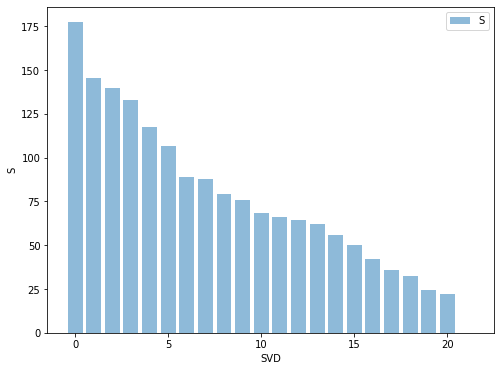

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(range(22), S, alpha=0.5, align='center', label='S')
plt.legend()
plt.ylabel('S')
plt.xlabel('SVD')
plt.show()

In [18]:
#Fitting the SVD class

AA = csr_matrix(X_features)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(AA)
TruncatedSVD(n_components=5, n_iter=7, random_state=42)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [19]:
svd.explained_variance_ratio_

array([0.18445868, 0.1239559 , 0.1143068 , 0.10316574, 0.08108677])

In [20]:
svd.explained_variance_ratio_.sum()

0.6069738923148708

In [21]:
svd.singular_values_

array([177.39613679, 145.42136093, 139.64668815, 132.66682876,
       117.61686698])

## **Linear Discriminant Analysis (LDA)**

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
# Now to select our training and testing data
features = X_features
labels = m_data.iloc[:, 0]

In [24]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=27)

model = LDA()
model.fit(X_train, y_train)
preds = model.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.9421538461538461
F1 Score: 0.9397435897435897


In [25]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.955076923076923
F1 Score: 0.9539432176656152


In [26]:
LDA_transform = LDA(n_components=1)
LDA_transform.fit(features, labels)
features_new = LDA_transform.transform(features)

# Print the number of features
print('Original feature #:', features.shape[1])
print('Reduced feature #:', features_new.shape[1])

# Print the ratio of explained variance
print(LDA_transform.explained_variance_ratio_)

Original feature #: 22
Reduced feature #: 1
[1.]


In [27]:
X_train, X_val, y_train, y_val = train_test_split(features_new, labels, test_size=0.2, random_state=27)

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.9427692307692308
F1 Score: 0.9404228058936579


## **Factor Analysis (FA)**

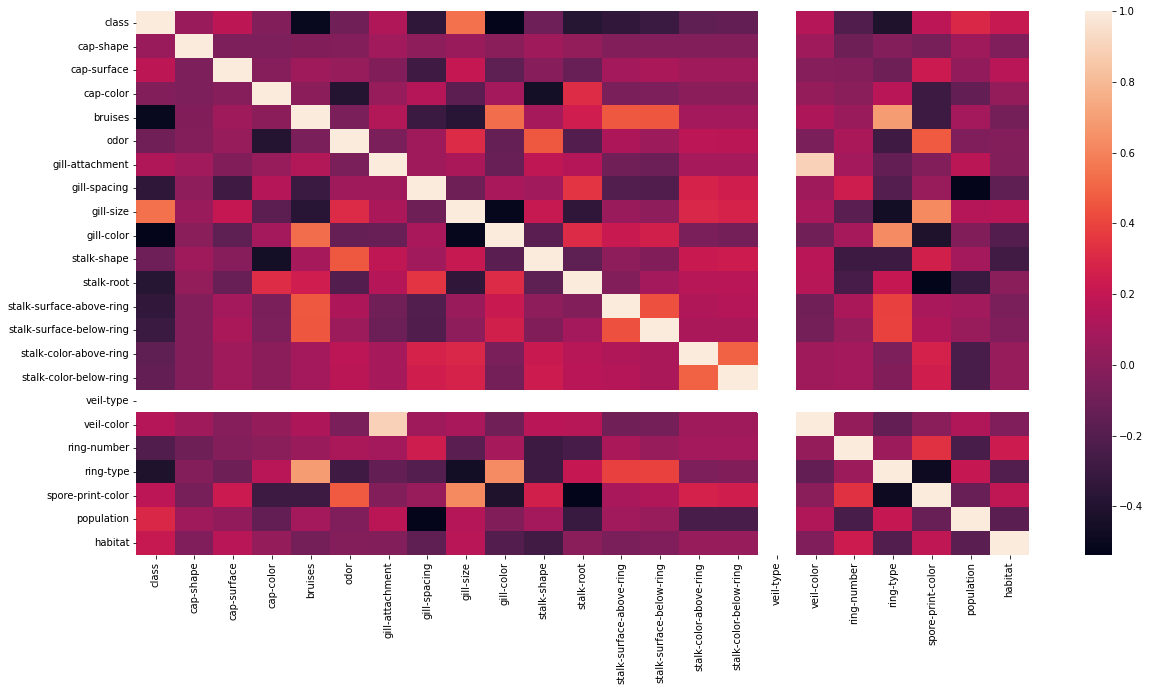

In [28]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= m_data.corr()
sns.heatmap(c)

In [29]:
# Import required libraries
import pandas as pd
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 576 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 49.5 MB/s 
     |████████████████████████████████| 98 kB 9.2 MB/s 
     |████████████████████████████████| 8.8 MB 58.1 MB/s 
     |████████████████████████████████| 468 kB 86.5 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42033 sha256=72958ace225e711c57660fc8f6af6a4937f2e56035b9178da9a04217fbad9f54
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [30]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [31]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [32]:
# Dropping NAN columns
m_data.drop(['veil-type'],axis=1,inplace=True)
# Dropping missing values rows
m_data.dropna(inplace=True)
# Dropping missing values rows
m_data.replace([np.inf, -np.inf], np.nan).dropna(axis=1) # You can replace inf and -inf with NaN, and then select non-null rows.
np.isnan(m_data).any()
np.isinf(m_data).any()
m_data = m_data.astype(float)

In [33]:
m_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0


In [34]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

In [35]:
# check for null values
m_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [36]:
m_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(m_data)
chi_square_value, p_value

(102996.82983646126, 0.0)

In [38]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(m_data)

In [39]:
kmo_model

0.5958429997471809

In [40]:
fa = FactorAnalyzer()
fa.fit(m_data)
eigen_values, vectors = fa.get_eigenvalues()

In [41]:
eigen_values

array([4.18388451, 2.7660183 , 2.54526047, 2.18750844, 1.77008334,
       1.42135446, 0.98172719, 0.9615058 , 0.7764821 , 0.71490158,
       0.58503355, 0.54948298, 0.50975004, 0.48561246, 0.39149932,
       0.35226333, 0.22127589, 0.19868218, 0.14232933, 0.12423934,
       0.07296399, 0.05814139])

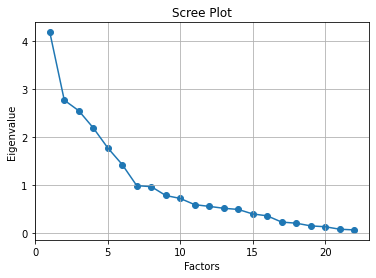

In [42]:
# Create scree plot using matplotlib
plt.scatter(range(1,m_data.shape[1]+1),eigen_values)
plt.plot(range(1,m_data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [43]:
fa = FactorAnalyzer(n_factors=10,rotation='varimax')
fa.fit(m_data)
print(pd.DataFrame(fa.loadings_,index=m_data.columns))

                                 0         1         2         3         4  \
class                    -0.521977  0.355281  0.097351 -0.115664 -0.493569   
cap-shape                -0.039971 -0.005460  0.068820  0.036474 -0.029965   
cap-surface               0.085859  0.172169 -0.005474  0.015572 -0.121438   
cap-color                -0.029128 -0.073000  0.040277 -0.629941  0.131049   
bruises                   0.773845 -0.473604  0.189872  0.058861 -0.067403   
odor                      0.047391  0.230777 -0.062385  0.601939  0.073075   
gill-attachment          -0.076345 -0.027711  0.981290 -0.012309 -0.074531   
gill-spacing             -0.288863  0.030413  0.038731 -0.053837  0.700331   
gill-size                -0.137446  0.719236  0.055417  0.178020 -0.296364   
gill-color                0.506791 -0.398876 -0.088179 -0.119003  0.188039   
stalk-shape              -0.088271 -0.064645  0.181748  0.815750 -0.061587   
stalk-root                0.162617 -0.384358  0.162302 -0.327276

In [44]:
# The amount of variance explained by each factor can be found out
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4,5,6,7,8,9
Variance,2.649475,2.061040,1.971737,1.906779,1.778862,1.462909,1.400551,1.087082,0.432778,0.190348
Proportional Var,0.120431,0.093684,0.089624,0.086672,0.080857,0.066496,0.063661,0.049413,0.019672,0.008652
Cumulative Var,0.120431,0.214114,0.303739,0.390410,0.471268,0.537764,0.601425,0.650838,0.670510,0.679162


In [45]:
# Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
pd.DataFrame(fa.get_communalities(),index=m_data.columns,columns=['Communalities'])

,Communalities
class,0.875687
cap-shape,0.040976
cap-surface,0.214124
cap-color,0.438828
bruises,0.917390
odor,0.469319
gill-attachment,0.997515
gill-spacing,0.971784
gill-size,0.928287
gill-color,0.590847


## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

[Clustering with KMeans, PCA, TSNE](https://www.kaggle.com/code/aussie84/clustering-with-kmeans-pca-tsne)

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

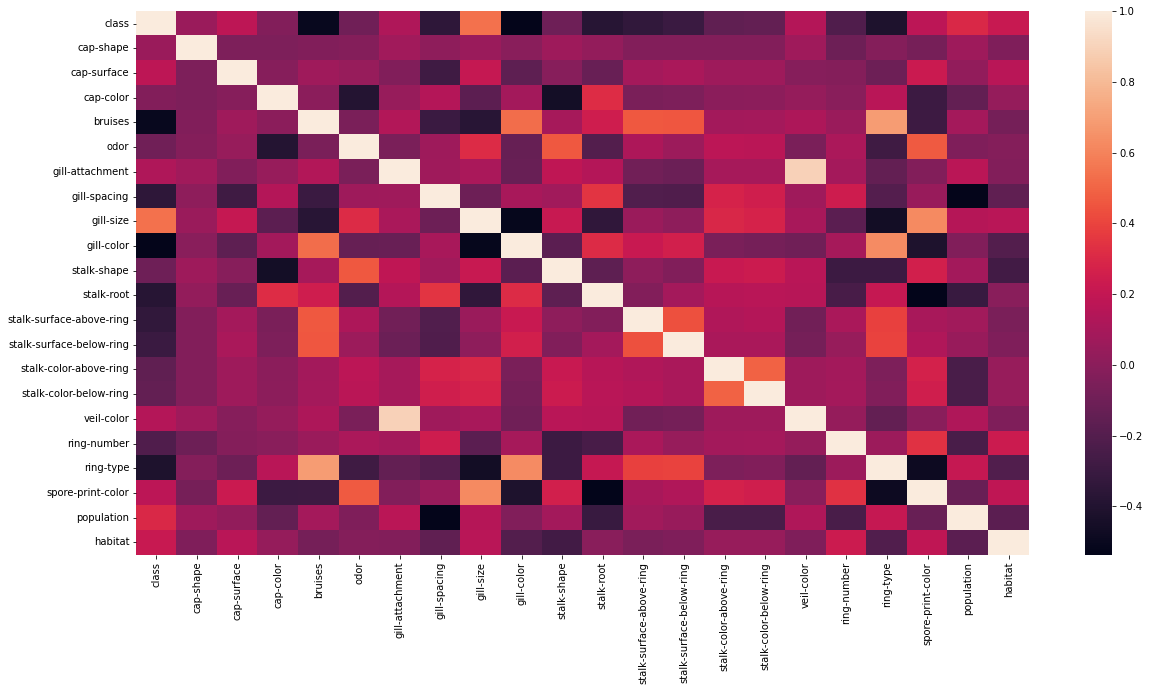

In [47]:
corr = m_data.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot")
fig = dict(data=data, layout=layout)
plt.figure(figsize=(20,10))
sns.heatmap(corr)

In [48]:
from sklearn.manifold import TSNE
X = m_data.iloc[:,1:23]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne.columns = ['x1','x2']

In [49]:
dftsne

,x1,x2
0,70.799179,45.129528
1,30.540123,-0.777360
2,22.994974,12.002314
3,52.593193,48.358307
4,20.235916,-93.357979
...,...,...
8119,-14.832669,28.358124
8120,-14.007187,27.401049
8121,-17.434010,71.879883
8122,-32.718605,-16.471395


In [50]:
#dftsne[dftsne.duplicated(keep=False)]
#display(m_data.drop_duplicates())

In [51]:
# to comparing clustering TSNE 2D and PCA 2D
dfpca_2d = pd.DataFrame(x_3d) # x_3d comes from PCA 2D
dfpca_2d.columns = ['x1','x2']

In [52]:
dfpca_2d

,x1,x2
0,-0.574322,-0.975778
1,-2.282102,0.279062
2,-1.858036,-0.270975
3,-0.884780,-0.756466
4,0.689614,1.239261
...,...,...
8119,-2.244846,-0.918549
8120,-2.538760,-1.671718
8121,-1.621516,-0.757538
8122,3.670606,-1.032774


Text(0.5, 0.98, 'Comparing clustering result when visualized using TSNE2D vs. PCA2D')

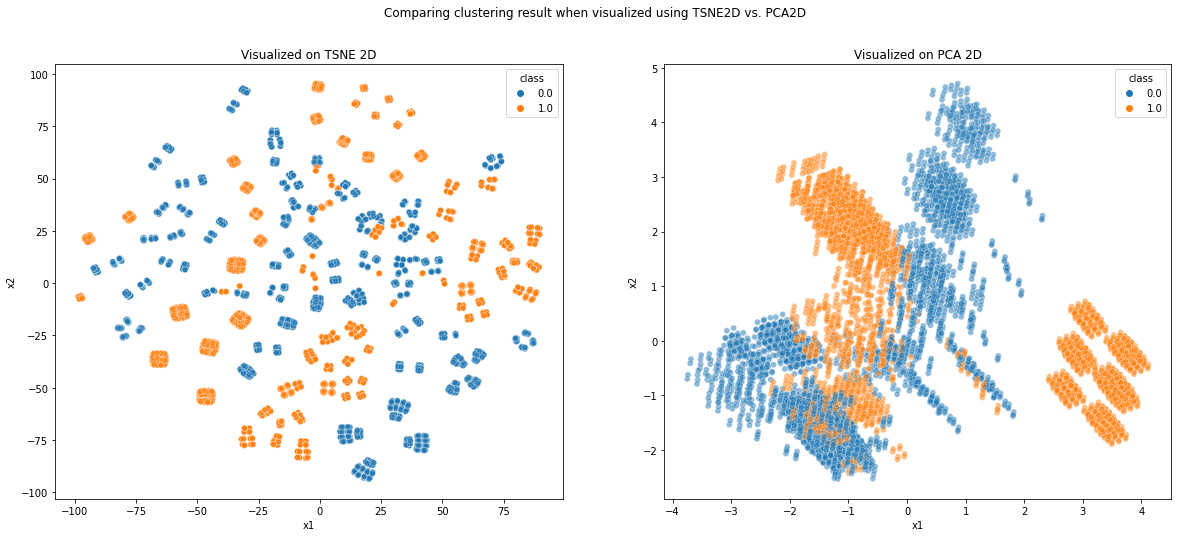

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue=m_data['class'],legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfpca_2d,x='x1',y='x2',hue=m_data['class'],legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
#display(fig)